<a href="https://colab.research.google.com/github/SalvadorRdR/IAC_2022/blob/salvador/Modelo_IGRF_13_IAC2022_SR_19_12_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


In [2]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF

fatal: destination path 'ppigrf' already exists and is not an empty directory.


In [4]:
import ppigrf

#Data

In [15]:
from datetime import datetime
h   = 560       # kilometers above sea level
date = datetime(2015, 12, 19) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [16]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.1, 0.1                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-56, 23 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-111, 16 + dx, dx)]

In [17]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [18]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto
Bt=np.squeeze(Bt)

##Plot

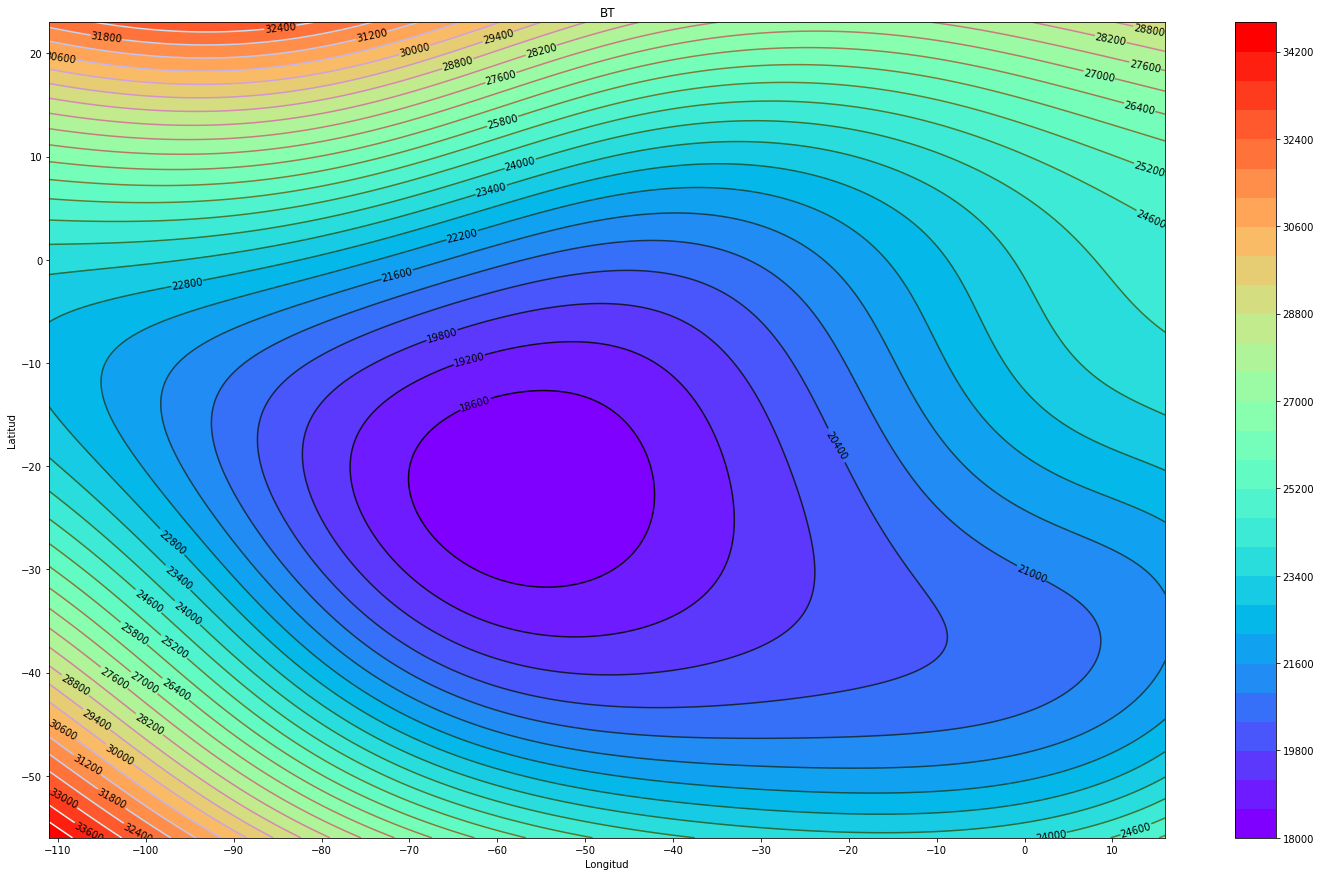

In [19]:

levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico


fig, ax = plt.subplots(figsize = (25,15))

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
cs = plt.contour(Lon, Lat, Bt, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-110,11,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

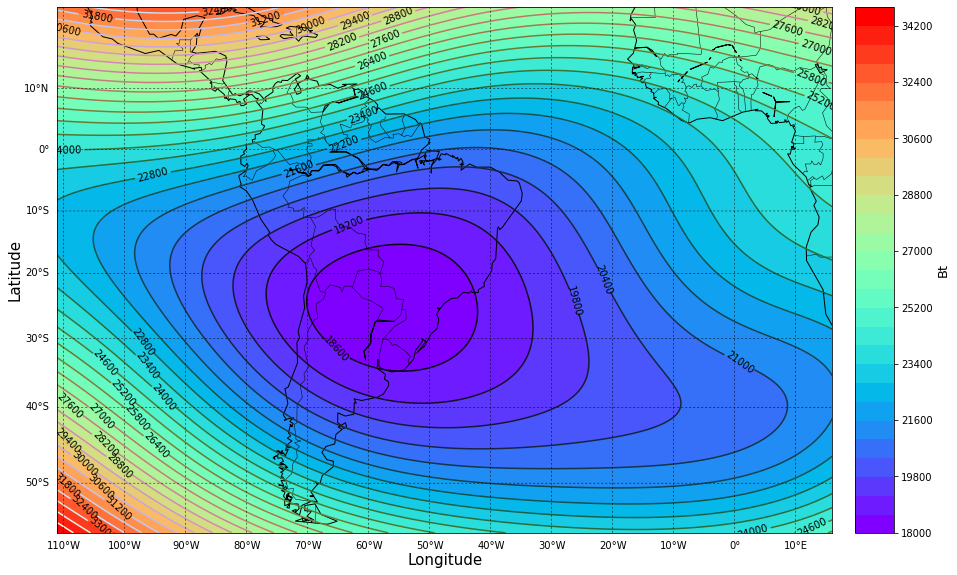

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid


fig = plt.figure(figsize = (15,15))
map = Basemap(projection='mill', 
              lat_0=-56+(23+56)/2, lon_0= -111+(16+111)/2,
              llcrnrlon=-111, 
              llcrnrlat=-56, 
              urcrnrlon=16, 
              urcrnrlat=23,resolution='c')
map.drawcoastlines()
map.drawcountries(linewidth=0.5)
map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
#map.fillcontinents(color='coral',lake_color='aqua')

data=Bt

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

im=map.pcolormesh(xx, yy, data,cmap=cmap, norm=norm)
cs = map.contour(xx, yy, data, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
cbar = map.colorbar(im, location='right', pad="3%")
cbar.set_label('Bt', fontsize=13)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')

plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)


plt.show()

In [22]:
Lon.shape,Lat.shape, Bt.shape

((791, 1271), (791, 1271), (791, 1271))

#Date Frame

In [23]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -111.0        -110.9        -110.8        -110.7        -110.6  \
-56.0  34762.818877  34741.672013  34720.516563  34699.352607  34678.180225   
-55.9  34726.157787  34704.987475  34683.808514  34662.620983  34641.424963   
-55.8  34689.486500  34668.293038  34647.090863  34625.880053  34604.660691   
-55.7  34652.805555  34631.589240  34610.364147  34589.130357  34567.887950   
-55.6  34616.115485  34594.876614  34573.628901  34552.372428  34531.107275   
...             ...           ...           ...           ...           ...   
 22.6  31835.167594  31843.177419  31851.160485  31859.116592  31867.045539   
 22.7  31880.255530  31888.289031  31896.295679  31904.275273  31912.227612   
 22.8  31925.366832  31933.423821  31941.453863  31949.456757  31957.432300   
 22.9  31970.500881  31978.581169  31986.634416  31994.660421  32002.658982   
 23.0  32015.657059  32023.760457  32031.836720  32039.885648  32047.907038   

             -110.5        -110.4       

In [24]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [25]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)